<a href="https://www.kaggle.com/lalina/data-challenge-day-2-of-5?scriptVersionId=86267950" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Hi, welcome back to my challenge! 
This time, I will continue my previous challenge. I plan to make 5 series of data challenge based on The 5 Day Data Challenge. This challenge is very suitable for begginner, especially to grab basic concept of visualization and hypothesis testing. 

[In the previous challenge I have created data visualization for numerical values and compared some nutrition in hot cereals and cold cereals](http://https://www.kaggle.com/lalina/data-challenge-day-1-of-5). This time, I will work with categorical values and try to do Chi-Square-Test.

### Table of Contents

* [Day 4: Visualize categorical data with a bar chart](#Day-4:-Visualize-categorical-data-with-a-bar-chart)
* [Day 5: Using a Chi-Square Test](#Day-5:-Using-a-Chi-Square-Test)
____

### Day 4 Challenge

Following [previous challenge](http://https://www.kaggle.com/lalina/data-challenge-day-1-of-5), I will visualize categorical data using bar chart. But before that, let's review our previous dataset :

In [1]:
#Import all the library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import probplot
import pylab

In [2]:
# Read the data
df = pd.read_csv('../input/80-cereals/cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


In [3]:
# Find the categorical data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


From table above, I got three categorical data : name of cereal, manufacturer, and type of cereal

In [4]:
df.describe(include = 'all')

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77,77,77,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
unique,77,7,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,100% Bran,K,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,23,74,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,NaN,NaN,NaN,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,NaN,NaN,NaN,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,NaN,NaN,NaN,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,NaN,NaN,NaN,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,NaN,NaN,NaN,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392


From description table, I got some information about this categorical values.
**Name** consists of 77 unique values which means there is 77 brands of cereal. 
**mfr** or manufacturers. We have 7 different manufacturers for those cereals.
**type** of cereal. There are hot cereals and cold cereals.

I will create a bar chart visualization contain number of cereals producted by manufacturers. I would like to see which manufacturer produced the highest number of cereal brands. Before that, I will prepare my dataset first using .groupby() and .count() as follow :


In [5]:
manufacturer = df.groupby('mfr').count().reset_index()
manufacturer

,mfr,name,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,A,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,G,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
2,K,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23
3,N,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
4,P,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
5,Q,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8
6,R,8,8,8,8,8,8,8,8,8,8,8,8,8,8,8


#### Steps to create the bar plot :
1. Create the blank plot and its size .
2. Use sns.barplot() to create the plot. Input the variables for x-axis, y-axis and dataframe.
3. Use parameter 'color' to make your plot more colorful, you may fine the code using google colour picker.
4. Next step is annotate the plot with information we need.
5. Using iteration .patches() and .annotate() to create value label for each bar.
6. Input the coordinate, alignment, size, and position of label.
7. Create axis label for x axis, y axis and give a title to the plot. 

and, **voila!**

Text(0.5, 1.0, 'Number of Cereal Products by Manufacturer')

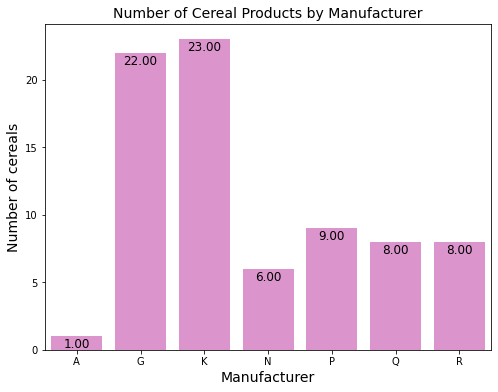

In [6]:
plt.figure(figsize = (8, 6)) # create the blank plot and its size
ax = sns.barplot(x= "mfr", #create bar plot using sns, define the x axis
                y = "name", #and define y axis 
                data = manufacturer, # the data frame
                color = "#e889d3") # pick your favourite colour! I used google colour picker

# label each bar in barplot
for p in ax.patches: # iterate through each bar
    ax.annotate(format(p.get_height(),'.2f'), # function annotate
                (p.get_x() + p.get_width() / 2., #get_x() and get_width() for x-coordinate
                p.get_height()), #get_height for y-coordinate
                ha = 'center', va = 'center', # horizontal and vertical alignment
                size=12, #text size
                xytext = (0, -8), 
                # xytext to decide the position of text, negative number will be display the number below of the bar
                textcoords = 'offset points') # specify the offset (in points) from xy value 

plt.xlabel("Manufacturer", size=14)
plt.ylabel("Number of cereals", size=14)
plt.title("Number of Cereal Products by Manufacturer", size = 14)

In conclusion, manufacturer K produced 23 brands of cereals which became the leading producer of cereal manufacturers. Manufacturer G followed as the second lead manufacturer, produced 22 brands of cereals in total. Others manufacturers mostly produced less than 10 cereal brands and manufacturer A only produced one cereal brand. 

For more information, I think this is [a good reference to learn about annotation.](http://https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/)


I would like to finish this challenge to day 5, however I think I can not do chi square test analysis for now because the dataset is lack of categorical data to compare. I could use hot vs cold cereals as before, but the number of hot cereals data is too few (only 3 data). That's why I decided to find more proper dataset to practice chi square test. See you later! 